In [39]:
# importing required python libraries 
import pandas as pd
import numpy as np
from datetime import datetime
%matplotlib inline
pd.set_option('display.max_rows', 100)

In [40]:
#reading Confirmed, deaths and recovered cases csv data and storing it in pandas data frame
confirmed_path='data/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
df_confirmed_raw=pd.read_csv(confirmed_path)

deaths_path='data/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
df_deaths_raw=pd.read_csv(deaths_path)


recovered_path='data/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv'
df_recovered_raw=pd.read_csv(recovered_path)

In [41]:
 #removing unwanted columns
df_confirmed_raw=df_confirmed_raw.drop(['Lat','Long'],axis=1)

# removing unwanted columns
df_deaths_raw=df_deaths_raw.drop(['Lat','Long'],axis=1)

# removing unwanted columns
df_recovered_raw=df_recovered_raw.drop(['Lat','Long'],axis=1)

In [42]:
#renaming columns
df_confirmed=df_confirmed_raw.rename(columns={'Country/Region':'country',
                      'Province/State':'state'})
df_confirmed['state']=df_confirmed['state'].fillna('NA')  #Fill NaN values using interpolation.
df_confirmed.head()

df_deaths=df_deaths_raw.rename(columns={'Country/Region':'country',
                      'Province/State':'state'})
df_deaths['state']=df_deaths['state'].fillna('NA')  #Fill NaN values using interpolation.
df_deaths.head()

df_recovered=df_recovered_raw.rename(columns={'Country/Region':'country',
                      'Province/State':'state'})
df_recovered['state']=df_recovered['state'].fillna('NA')  #Fill NaN values using interpolation.
df_recovered.head()


,state,country,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,7/20/21,7/21/21,7/22/21,7/23/21,7/24/21,7/25/21,7/26/21,7/27/21,7/28/21,7/29/21
0,NA,Afghanistan,0,0,0,0,0,0,0,0,...,82586,82586,82586,82586,82586,82586,82586,82586,82586,82586
1,NA,Albania,0,0,0,0,0,0,0,0,...,130086,130097,130109,130118,130125,130139,130152,130166,130174,130187
2,NA,Algeria,0,0,0,0,0,0,0,0,...,107041,107776,108537,109349,109951,110577,111322,112050,112900,113707
3,NA,Andorra,0,0,0,0,0,0,0,0,...,13930,13930,13988,13988,13988,13988,14077,14113,14113,14180
4,NA,Angola,0,0,0,0,0,0,0,0,...,34857,34893,35082,35284,35423,35474,35686,35742,35964,36025


In [43]:
# From df_confirmed data frame fetching coulmn names from 4th column 
date_idx=df_confirmed.columns[2:]
data_confirmed,data_deaths,data_recovered = pd.DataFrame({
    'date':date_idx}),pd.DataFrame({
    'date':date_idx}),pd.DataFrame({
    'date':date_idx})


In [63]:

#Creating a list with 5 countries.
country_list=['India','US','Russia','Turkey','Brazil'] 

#updating the transposed data with countries confirmed cases data wise
for each in country_list:
    data_confirmed[each]=np.array(df_confirmed[df_confirmed['country']==each].iloc[:,2::].sum(axis=0)) #selection from 2nd column onwards and transpose 
   
for each in country_list:
    data_deaths[each]=np.array(df_deaths[df_deaths['country']==each].iloc[:,2::].sum(axis=0)) #selection from 2nd column onwards and transpose 
   
for each in country_list:
    data_recovered[each]=np.array(df_recovered[df_recovered['country']==each].iloc[:,2::].sum(axis=0)) #selection from 2nd column onwards and transpose 

In [50]:
df_outer = pd.merge(data_confirmed, data_deaths, on='date', how='outer',suffixes=('_confirmed','_deaths'))

In [61]:
df_outer_full=pd.merge(df_outer, data_recovered, on='date', how='outer')

In [62]:
df_outer_full

,date,India_confirmed,US_confirmed,Russia_confirmed,Turkey_confirmed,Brazil_confirmed,India_deaths,US_deaths,Russia_deaths,Turkey_deaths,Brazil_deaths,India,US,Russia,Turkey,Brazil
0,1/22/20,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1/23/20,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1/24/20,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1/25/20,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1/26/20,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
550,7/25/21,31411262,34444083,6049215,5601608,19688663,420967,610681,151352,50934,549924,30579106,0,5424361,5421148,17702038
551,7/26/21,31440951,34533179,6071893,5618417,19707662,421382,610952,152069,50997,550502,30621469,0,5440451,5426733,17704701
552,7/27/21,31484605,34603919,6094379,5638178,19749073,422022,611414,152836,51048,551835,30663147,0,5459932,5433841,17715481
553,7/28/21,31528114,34672690,6116249,5660469,19797086,422662,611801,153620,51124,553179,30701612,0,5480150,5438038,17742532


<AxesSubplot:title={'center':'Covid-19 Confirmed cases as on 29-07-2021'}, xlabel='date'>

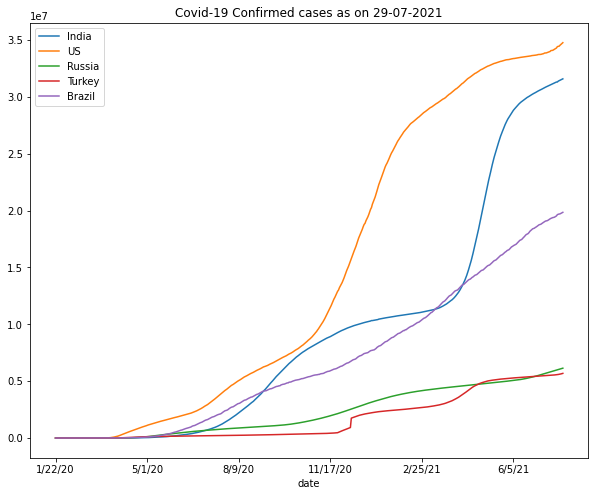

In [64]:
data_confirmed.set_index('date').plot(title="Covid-19 Confirmed cases as on 29-07-2021",figsize=(10,8))    

<AxesSubplot:title={'center':'Covid-19 Deaths as on 29-07-2021'}, xlabel='date'>

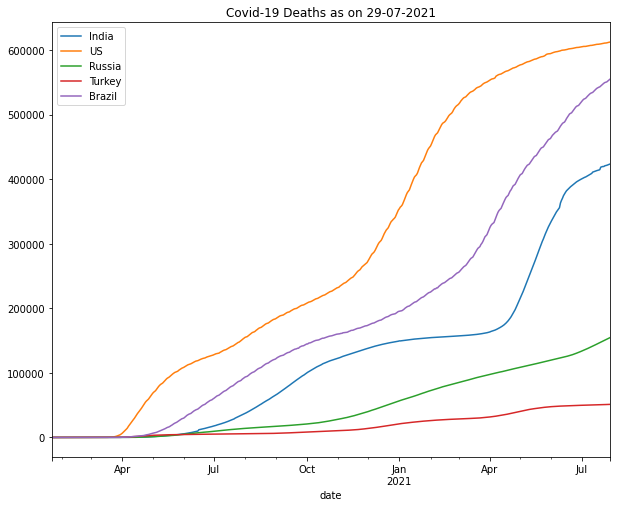

In [37]:
data_deaths.set_index('date').plot(title="Covid-19 Deaths as on 29-07-2021",figsize=(10,8))    


<AxesSubplot:title={'center':'Covid-19 recovered cases as on 29-07-2021'}, xlabel='date'>

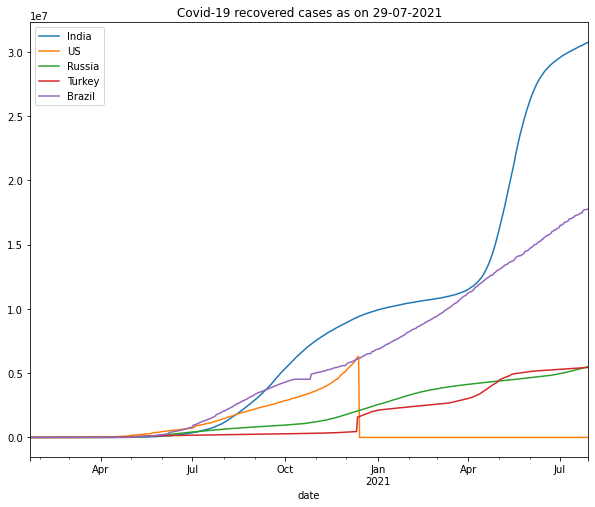

In [38]:
data_recovered.set_index('date').plot(title="Covid-19 recovered cases as on 29-07-2021",figsize=(10,8))    

In [20]:

# convert to time stamp
timestp=[datetime.strptime( each,"%m/%d/%y") for each in data_confirmed.date] 

#updating date datype in data frame
data_confirmed['date']=timestp
data_deaths['date']=timestp
data_recovered['date']=timestp

In [22]:

# saving the processed data as a csv file to local folder with Confirmed_processed name.
data_confirmed.to_csv('data/processed/Confirmed_processed.csv',index=False) 
data_deaths.to_csv('data/processed/Deaths_processed.csv',index=False) 
data_recovered.to_csv('data/processed/Recovered_processed.csv',index=False) 
